In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# 스타일 테마 설정
sns.set_style("darkgrid")

## 회귀선이 있는 산점도

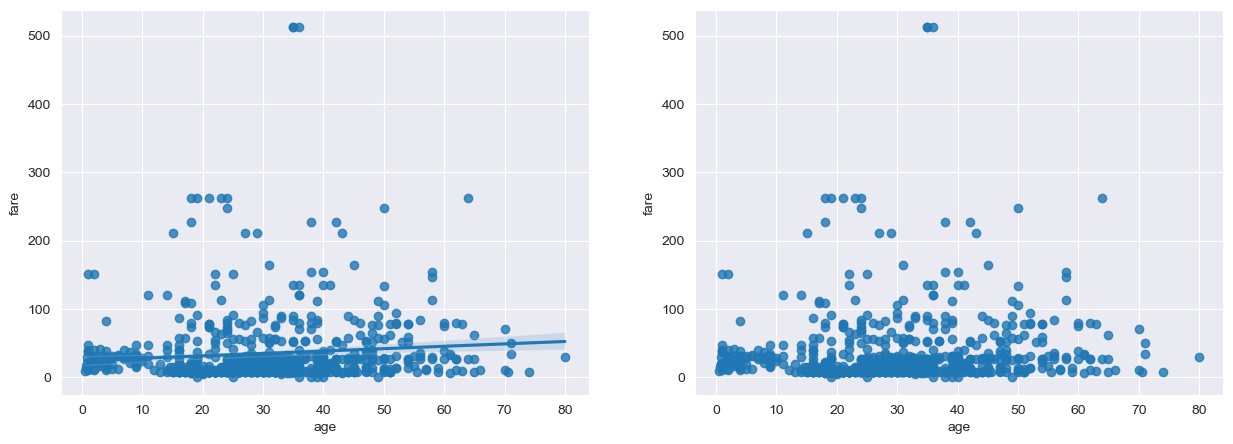

In [7]:
# 그래프 객체 생성
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 그래프 그리기 - 선형회귀선 표시(fit_reg = True)
sns.regplot(x = "age", # x 축 변수
           y = "fare", # y 축 변수
           data = titanic, # 데이터
           ax = ax1) # axe 객체 - 1번째 그래프

# 그래프 그리기 - 선형회귀선 미표시(fit_reg = False)
sns.regplot(x = "age", # x 축 변수
           y = "fare", # y 축 변수
           data = titanic, # 데이터
           ax = ax2, # axe 객체 - 1번째 그래프
           fit_reg = False) # 회귀선 미표시
plt.show()

# 히스토그램/커널 밀도 그래프

C:\Users\sungj\AppData\Local\Temp\ipykernel_6868\3890079692.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["fare"], ax = ax1)


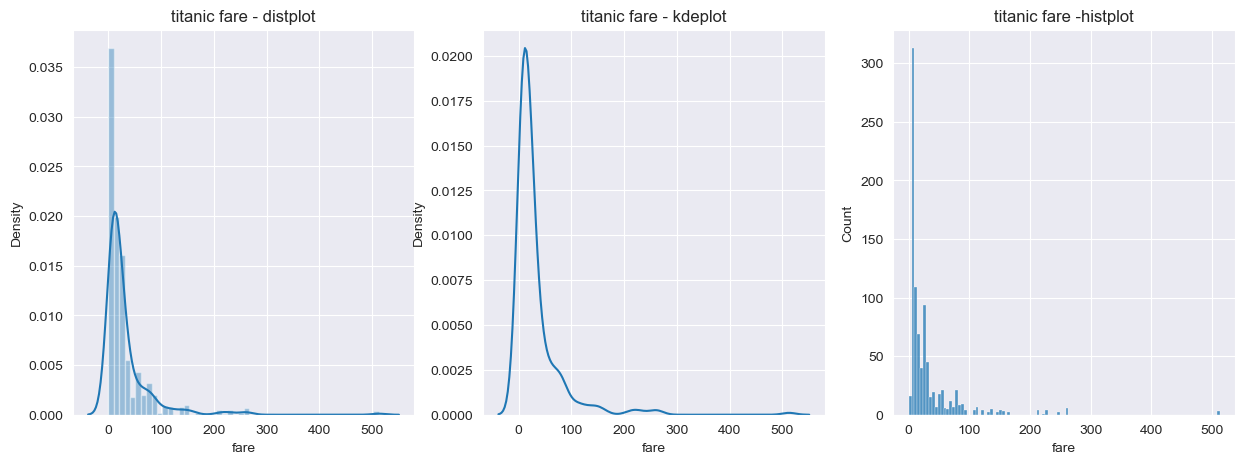

In [8]:
# 그래프 객체 생성(figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# distplot
sns.distplot(titanic["fare"], ax = ax1)

# kdeplot
sns.kdeplot(x = "fare", data = titanic, ax = ax2)

# histplot
sns.histplot(x = "fare", data = titanic, ax = ax3)

# 차트 제목 표시
ax1.set_title("titanic fare - distplot")
ax2.set_title("titanic fare - kdeplot")
ax3.set_title("titanic fare -histplot")

plt.show()

## 히트맵

- 2개의 범주형 변수를 각각 x축, y축에 놓고 데이터를 행렬 형태로 분류하여 시각화

In [9]:
# 피벗테이블로 범주형 변수를 각각 행, 열로 재구분하여 정리
table = titanic.pivot_table(index = ["sex"], columns = ["class"], aggfunc = "size")
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


<Axes: xlabel='class', ylabel='sex'>

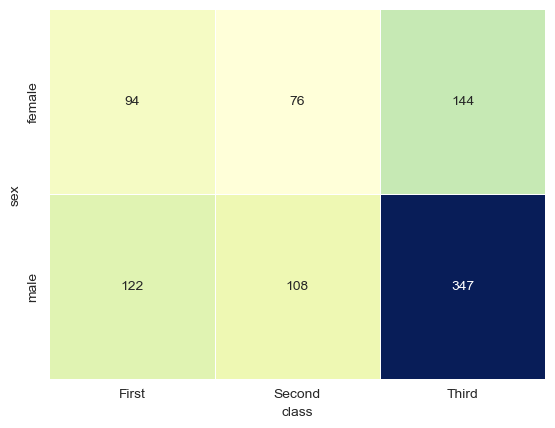

In [10]:
# 히트맵 그리기
sns.heatmap(table,
            annot = True, fmt = "d", # 데이터 값 표시 여부, 정수형 포맷
            cmap = "YlGnBu", # 컬러맵
            linewidth = .5, # 구분선
           cbar = False) # 컬러바 표시 여부

## 범주형 데이터의 산점도

- 범주형 변수에 들어 있는 각 범주별 데이터의 분포를 확인
    - stripplot()
        - 데이터 분산 미고려(중복 표시 있음)
        
    - swarmplot()
        - 데이터의 분산을 고려하여 데이터 포인트가 서로 중복되지 않도록 시각화
        - 데이터가 퍼져 있는 정도를 입체적으로 볼 수 있음

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


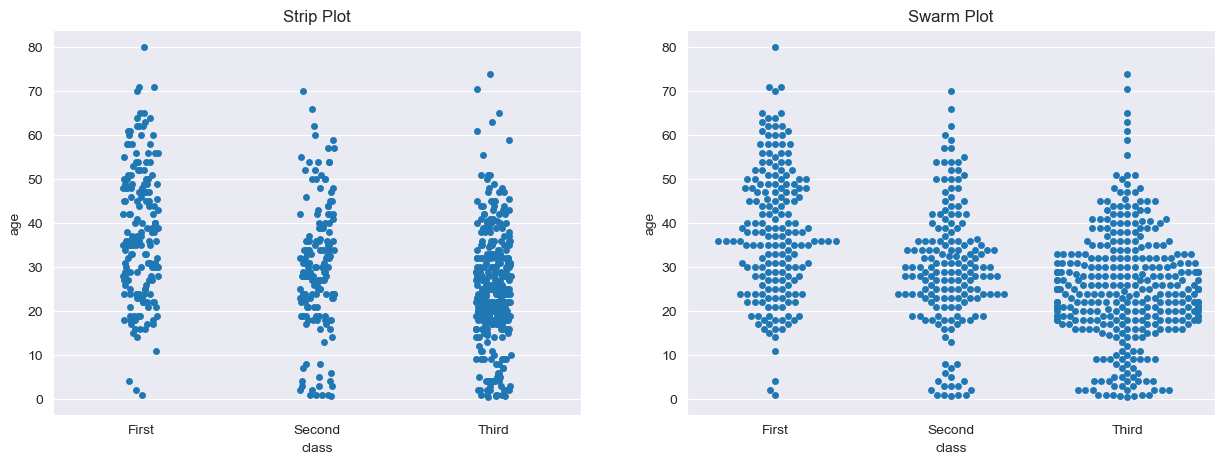

In [14]:
# 그래프 객체 생성
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x = "class", # x축 변수
             y = "age", # y 축 변수
             data = titanic, # 데이터셋 - 데이터프레임
             ax = ax1) # axe 객체 - 1번째 그래프
# 이산형 변수의 분포 - 데이터 분산 고려(중복x)
sns.swarmplot(x = "class", # x축 변수
             y = "age", # y 축 변수
             data = titanic, # 데이터셋 - 데이터프레임
             ax = ax2) # axe 객체 - 1번째 그래프

# 차트 제목 표시
ax1.set_title("Strip Plot")
ax2.set_title("Swarm Plot")
plt.show()

## 막대그래프

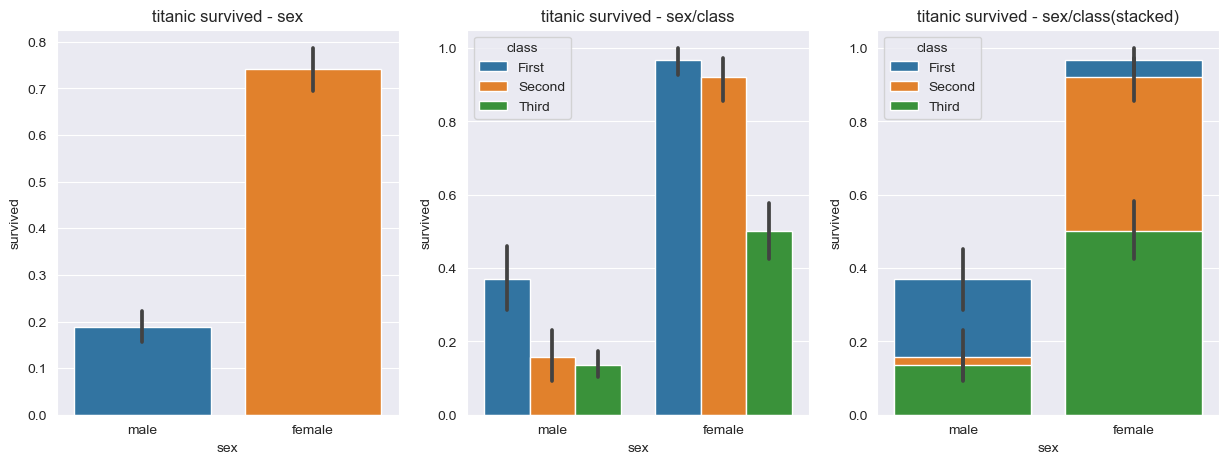

In [15]:
# 그래프 객체 생성
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# x축 , y축에 변수 할당
sns.barplot(x = "sex", y = "survived", data = titanic, ax = ax1)

# x축, y축에 변수 할당하고 hue 옵션 추가
sns.barplot(x = "sex", y = "survived", hue = "class", data = titanic, ax = ax2)

# x축, y축 변수 할당하고 hue 옵션 추가하여 누적 출력
sns.barplot(x = "sex", y = "survived", hue = "class", data = titanic, dodge = False, ax = ax3)

# 차트 제목 표시
ax1.set_title("titanic survived - sex")
ax2.set_title("titanic survived - sex/class")
ax3.set_title("titanic survived - sex/class(stacked)")
plt.show()

## 빈도 그래프

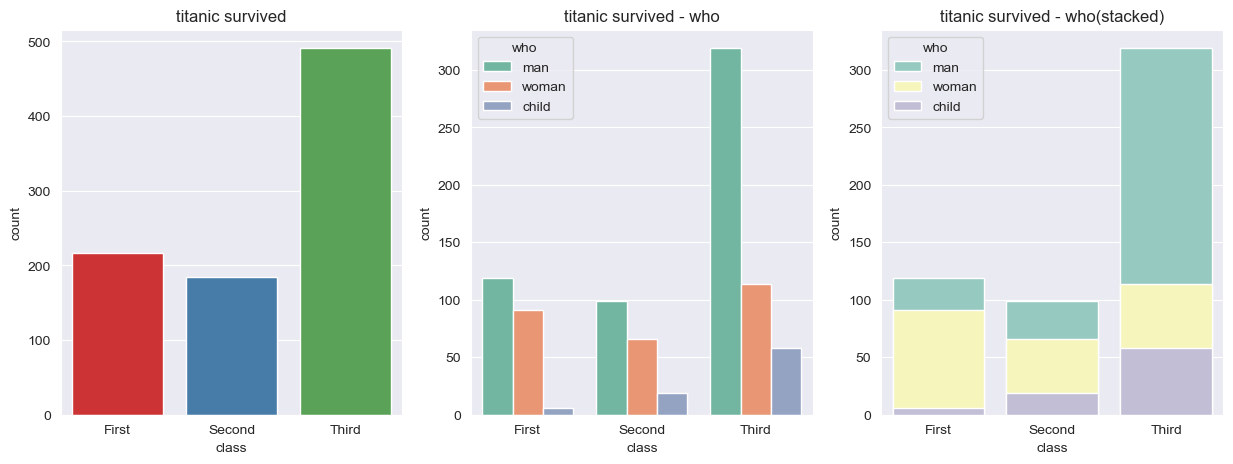

In [23]:
# 그래프 객체 생성
fig = plt.figure(figsize= (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

# 기본값
sns.countplot(x = "class", palette = "Set1", data = titanic, ax = ax1)

# hue 옵션에 "who" 추가
sns.countplot(x = "class", hue = "who", palette = "Set2", data = titanic, ax = ax2)

# dodge = False 옵션 추가
sns.countplot(x = "class", hue = "who", palette = "Set3", dodge = False, data = titanic, ax = ax3)

#타이틀 표시
ax1.set_title("titanic survived")
ax2.set_title("titanic survived - who")
ax3.set_title("titanic survived - who(stacked)")
plt.show()

## 박스 플롯/바이올린 그래프

- 박스 플롯 : 범주형 데이터 분포와 주요 통계 지표를 함께 제공
    - 다만 박스 플롯만으로는 데이터가 퍼져있는 분산의 정도를 정확하게 알기 어렵기 때문에 커널 밀도 함수 그래프를 y축 방향에 추가하여 바이올린 그래프를 그리는 경우도 있음

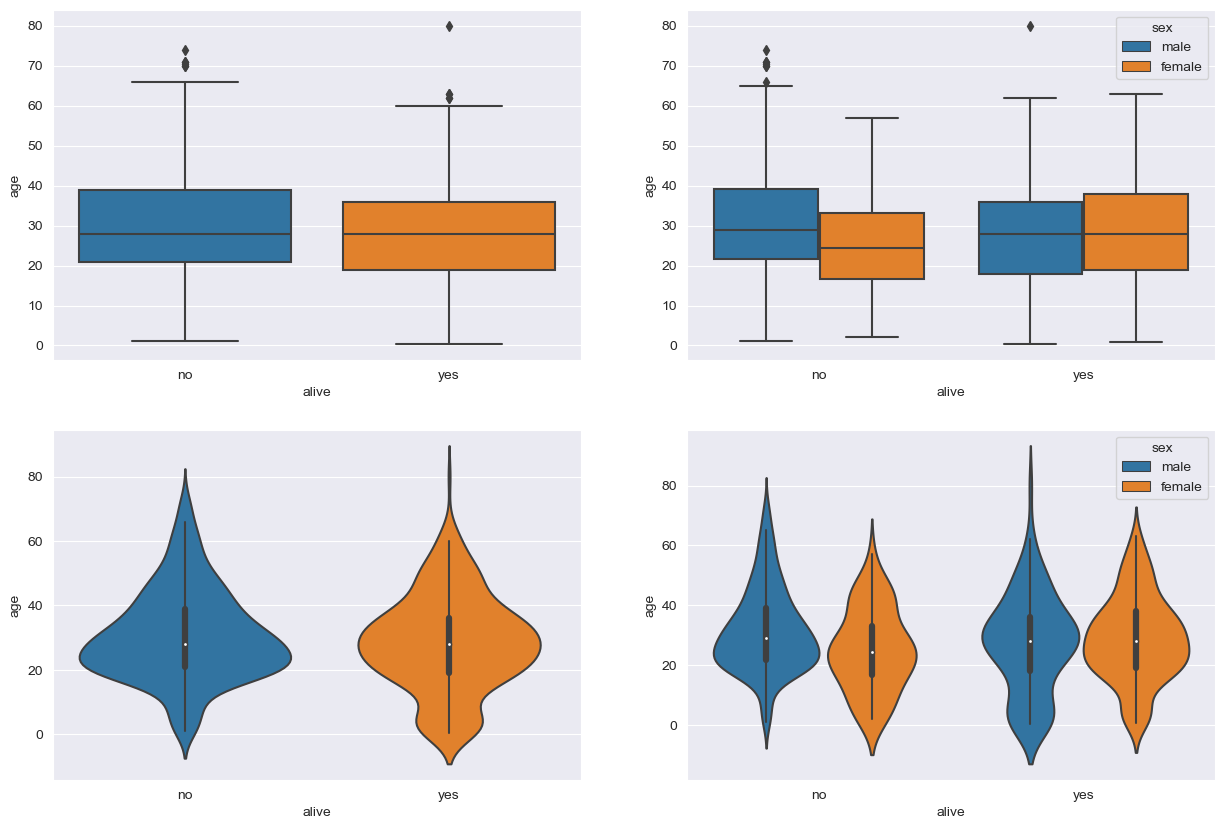

In [20]:
# 그래프 객체 생성
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# 박스 그래프 - 기본값
sns.boxplot(x = "alive", y = "age", data = titanic, ax = ax1)

# 박스그래프 - hue 변수 추가
sns.boxplot(x = "alive", y = "age", hue = "sex", data = titanic, ax = ax2)

# 바이올린 그래프 - 기본값
sns.violinplot(x = "alive", y = "age", data = titanic, ax = ax3)

# 바이올린 그래프 - 기본값
sns.violinplot(x = "alive", y = "age", hue = "sex", data = titanic, ax = ax4)

plt.show()